In [2]:
import time
from tqdm import *
import random
from math import *
import operator
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(9,6))

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
###from sklearn import preprocessing, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<Figure size 648x432 with 0 Axes>

In [3]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [4]:
 location = r"E:\Python\Machine Learning\datasets\glass.csv"

In [5]:
# load the training data from glass data set
df_training = pd.read_csv(r'E:\Python\Machine Learning\datasets\glass.csv')

In [6]:
# Question: Pretend that we want to predict ri, and our only feature is al. 
# How could we do it using machine learning?

# Answer: We could frame it as a regression problem, and use a linear 
#         regression model with al as the only feature and ri as the 
#         response.

# Question: How would we visualize this model?

# Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, 
#         and draw the line of best fit.

In [7]:
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass=pd.read_csv(r'E:\Python\Machine Learning\datasets\glass.csv')
#glass = pd.read_csv(url, names=col_names, index_col='id')

#glass.sort_values ('Al', inplace=True)

glass.tail(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


<Figure size 864x432 with 0 Axes>

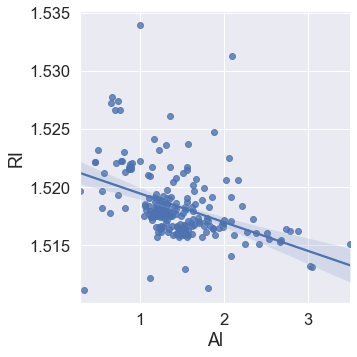

In [8]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Al', y='RI', data=glass, ci=90)

<Figure size 1080x576 with 0 Axes>

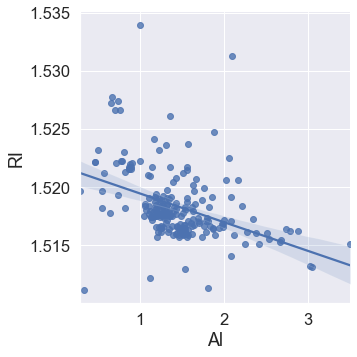

In [11]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Al', y='RI', data=glass, ci=95)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Al', ylabel='RI'>

<Figure size 864x432 with 0 Axes>

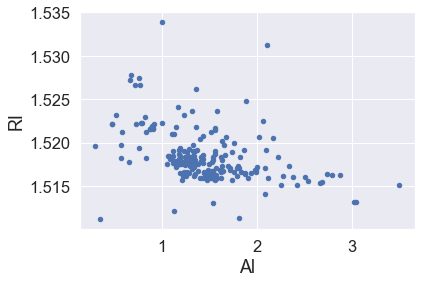

In [8]:
# Question: How would we draw this plot without using Seaborn?

# scatter plot using Pandas
plt.figure(figsize=(12,6))
glass.plot(kind='scatter', x='Al', y='RI')

Text(0, 0.5, 'RI')

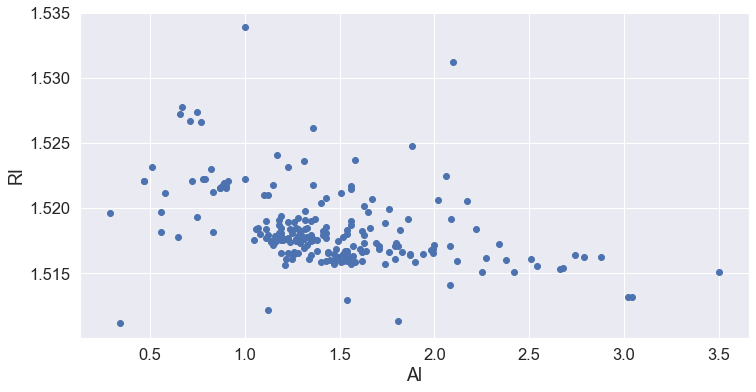

In [9]:
# equivalent scatter plot using Matplotlib
plt.figure(figsize=(12,6))

plt.scatter(glass.Al, glass.RI)
plt.xlabel('Al')
plt.ylabel('RI')

In [3]:
# fit a linear regression model

linreg       = LinearRegression()
feature_cols = ['Al']
#X            = glass[['Al']]
X            = glass[feature_cols]
y            = glass.RI

linreg.fit(X, y)

LinearRegression()

In [4]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


Text(0, 0.5, 'Predicted RI')

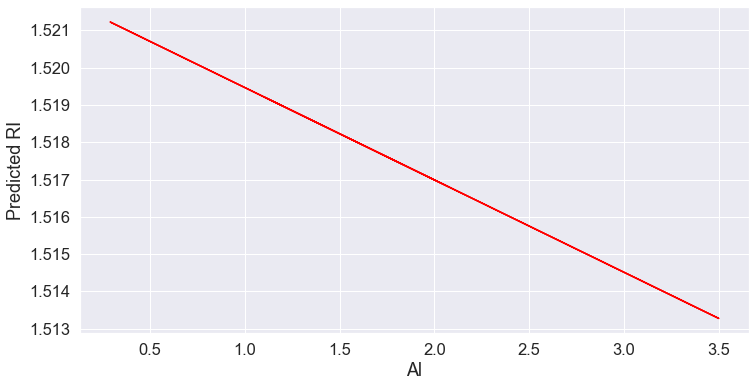

In [12]:
# plot those predictions connected by a line
plt.figure(figsize=(12,6))

plt.plot(glass.Al, glass.ri_pred, color='red')
plt.xlabel('Al')
plt.ylabel('Predicted RI')

Text(0, 0.5, 'RI')

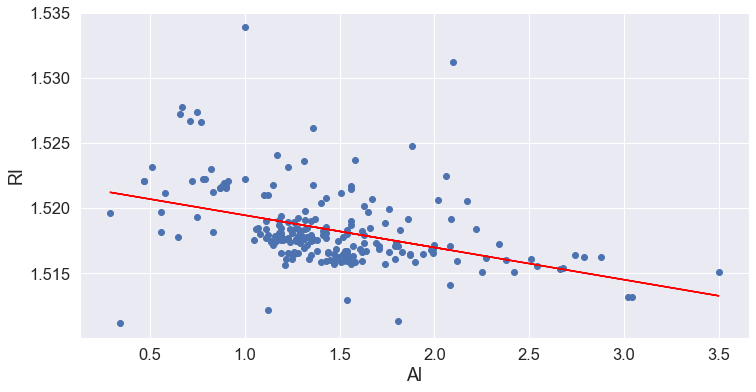

In [13]:
# put the plots together
plt.figure(figsize=(12,6))

plt.scatter(glass.Al, glass.RI)
plt.plot(glass.Al, glass.ri_pred, color='red')

plt.xlabel('Al')
plt.ylabel('RI')

Refresher: interpreting linear regression coefficients
Linear regression equation: y=β0+β1x

In [14]:
# compute prediction for al=2 using the equation
print(linreg.intercept_)
print(linreg.coef_)
linreg.intercept_ + linreg.coef_ * 2

1.5219453302386425
[-0.00247761]


array([1.51699012])

In [15]:
# compute prediction for al=2 using the predict method
linreg.predict([[2]])

array([1.51699012])

In [16]:
# examine coefficient for al
zip(feature_cols, linreg.coef_)

In [17]:
linreg.coef_

array([-0.00247761])

Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

Predicting a Categorical Response

In [13]:
# examine glass_type
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [19]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


Let's change our task, so that we're predicting household type using al. 
Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

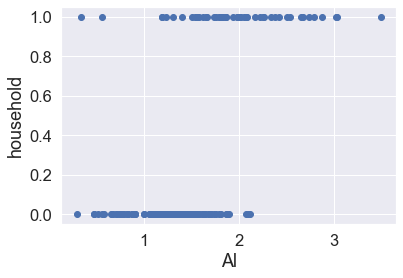

In [20]:
plt.scatter(glass.Al, glass.household)
plt.xlabel('Al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [21]:
# fit a linear regression model and store the predictions
feature_cols = ['Al']
X = glass[feature_cols]
y = glass.household

linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623


Text(0, 0.5, 'household')

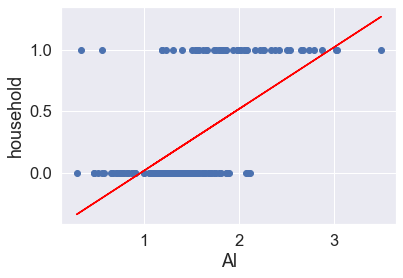

In [22]:
# scatter plot that includes the regression line

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred, color='red')

plt.xlabel('Al')
plt.ylabel('household')

If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and the 1 class for higher values of al. 

What's our cutoff value? Around al=2, because that's where the linear regression line crosses 
the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

In [23]:
# understanding np.where
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and 
# the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [24]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


In [39]:
glass[glass["household"]!=glass["household_pred_class"]].shape

(29, 17)

Text(0, 0.5, 'household')

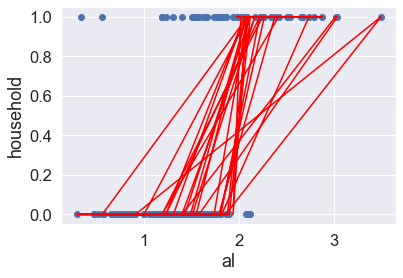

In [38]:
# plot the class predictions
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al,    glass.household_pred_class, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [25]:
# Using Logistic Regression Instead
# Logistic regression can do what we just did:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()

feature_cols = ['Al']

X = glass[feature_cols]
y = glass.household

logreg.fit(X, y)

glass['household_pred_class1'] = logreg.predict(X)

In [29]:
glass[glass["household_pred_class"]!= glass["household_pred_class1"]]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class,household_pred_class1
212,213,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7,1.517139,1,0.486447,0,1


Text(0, 0.5, 'household')

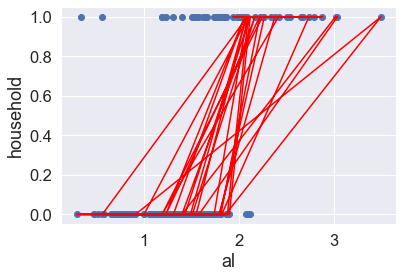

In [30]:
# plot the class predictions
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_class1, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [ ]:
# What if we wanted the predicted probabilities instead of just the class predictions, 
# to understand how confident we are in a given prediction?

In [27]:
 logreg.predict_proba(X)

array([[0.87167128, 0.12832872],
       [0.80106431, 0.19893569],
       [0.73710609, 0.26289391],
       [0.82255126, 0.17744874],
       [0.83675492, 0.16324508],
       [0.70476692, 0.29523308],
       [0.86240111, 0.13759889],
       [0.88250481, 0.11749519],
       [0.79784018, 0.20215982],
       [0.80106431, 0.19893569],
       [0.7292383 , 0.2707617 ],
       [0.82834582, 0.17165418],
       [0.78793454, 0.21206546],
       [0.82834582, 0.17165418],
       [0.8166044 , 0.1833956 ],
       [0.83948328, 0.16051672],
       [0.85755848, 0.14244152],
       [0.91198573, 0.08801427],
       [0.85257455, 0.14742545],
       [0.67465881, 0.32534119],
       [0.7561213 , 0.2438787 ],
       [0.97193375, 0.02806625],
       [0.82255126, 0.17744874],
       [0.80424964, 0.19575036],
       [0.85999733, 0.14000267],
       [0.84482923, 0.15517077],
       [0.78455484, 0.21544516],
       [0.81050416, 0.18949584],
       [0.77767878, 0.22232122],
       [0.8254675 , 0.1745325 ],
       [0.

In [33]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [34]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class,household_pred_class1,household_pred_prob
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0,0,0.070263
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0,0,0.145207
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0,0,0.229353
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0,0,0.120176
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0,0,0.104657


Text(0, 0.5, 'household')

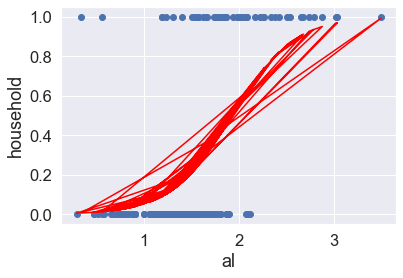

In [35]:
# plot the predicted probabilities
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [38]:
# examine some example predictions
print (logreg.predict_proba([[1]]))
print (logreg.predict_proba([[2]]))
print (logreg.predict_proba([[3]]))
print (logreg.predict_proba([[5]]))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]
[[0.00265925 0.99734075]]


In [39]:
# The first column indicates the predicted probability of class 0, and 
# the second column indicates the predicted probability of class 1.

Linear regression: continuous response is modeled as a linear combination of the features:

y=β0+β1x

Logistic regression: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

log(p/1−p) = β0+β1x
This is called the logit function.

Probability is sometimes written as pi:

log(π/1−π) = β0+β1x
The equation can be rearranged into the logistic function:

π=eβ0+β1x1/ 1+ eβ0+β1x
In other words:

Logistic regression outputs the probabilities of a specific class
Those probabilities can be converted into class predictions
The logistic function has some nice properties:

Takes on an "s" shape
Output is bounded by 0 and 1
We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

Most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): decompose the problem into multiple binary classification problems
Multinomial logistic regression can solve this as a single problem

In [ ]:
# Interpreting Logistic Regression Coefficients

Text(0, 0.5, 'household')

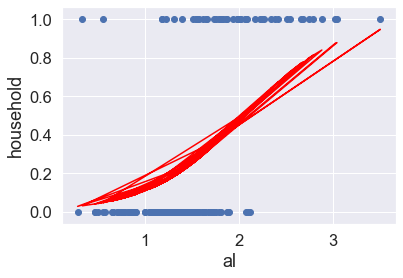

In [40]:
# plot the predicted probabilities again
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob.sort_values(), color='red')
plt.xlabel('al')
plt.ylabel('household')

In [41]:
print(logreg.intercept_ )
print(logreg.coef_)

[-4.12790736]
[[2.01099096]]


In [42]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

In [43]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([0.89949172])

In [44]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.47354338])

In [45]:
# compute predicted probability for al=2 using the predict_proba method
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[2]])[:, 1])

[[0.52645662 0.47354338]]
[0.47354338]


In [46]:
# examine the coefficient for al
for i in zip(feature_cols, logreg.coef_[0]):
    print(i)

('Al', 2.0109909641729407)


Interpretation: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [47]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [48]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba([[3]])[:, 1]

array([0.87046377])

Bottom line: 
    Positive coefficients increase the log-odds of the response 
    (and thus increase the probability), 
    and negative coefficients decrease the log-odds of the response 
    (and thus decrease the probability).

In [49]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

Interpretation: For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [50]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.01586095])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

In [51]:
# Logistic regression can still be used with categorical features.
# create a categorical feature
glass['high_Ba'] = np.where(glass.Ba > 0.5, 1, 0)

glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class,household_pred_prob,high_Ba
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0,0.128329,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0,0.198936,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0,0.262894,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0,0.177449,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0,0.163245,0


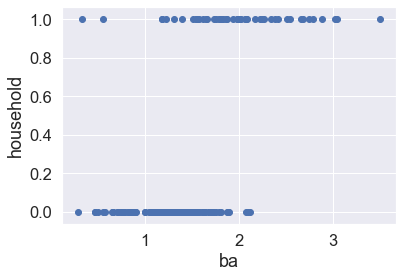

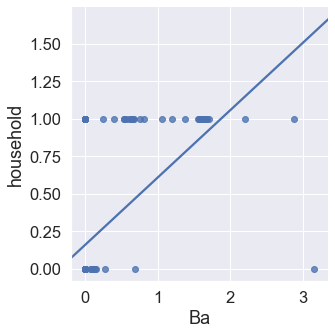

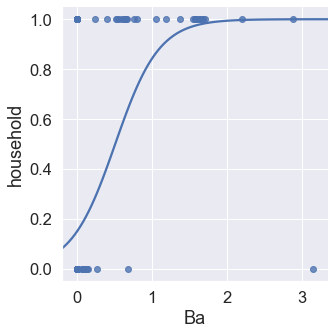

In [52]:
plt.scatter(glass.Al, glass.household)
plt.xlabel('ba')
plt.ylabel('household')

sns.lmplot(x='Ba', y='household', data=glass, ci=None)

sns.lmplot(x='Ba', y='household', data=glass, ci=None, logistic=True)

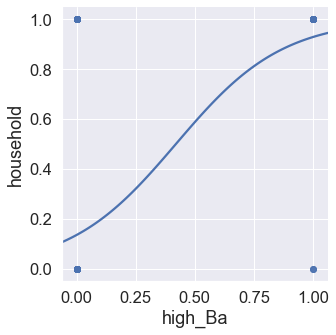

In [53]:
# categorical feature
sns.lmplot(x='high_Ba', y='household', data=glass, ci=None, logistic=True)

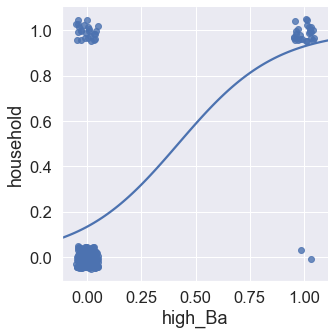

In [54]:
# categorical feature, with jitter added
sns.lmplot(x='high_Ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [55]:
# fit a linear regression model and store the predictions
logreg = LogisticRegression(C=1e9)

feature_cols = ['high_Ba']

X = glass[feature_cols]

y = glass.household

logreg.fit(X, y)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# examine the coefficient for high_ba
zip(feature_cols, logreg.coef_[0])

In [57]:
# [('high_ba', 4.4273153450187195)]
# Interpretation: Having a high 'ba' value is associated with a 4.43 unit increase in 
# the log-odds of 'household' (as compared to a low 'ba' value).